In [38]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE

In [39]:
import sys
sys.path.append('../code')
from cf_model import CFModel
from model_evaluator import ModelEvaluator
from random_model import RandomModel
from implicit_model import ImplicitModel
model_evaluator = ModelEvaluator(k_list = [10])

In [40]:
readers = pd.read_csv("../data/readers.csv")
readers = readers.rename(columns={"id":"user_id", "art_id":"nzz_id"})
readers.head()

,user_id,nzz_id
0,1,ld.154103
1,1,ld.142559
2,1,1.18331199
3,1,ld.144819
4,1,ld.1293110


In [41]:
read_counts = readers["user_id"].value_counts(sort=True)
read_counts = read_counts.rename_axis("user_id").reset_index(name="read_count")

# Biorę pod uwagę tylko użytkowników, którzy przeczytali minimum 5 artykułów
min_read_count = 3
read_counts = read_counts[read_counts["read_count"] > min_read_count]

readers = readers[readers["user_id"].isin(read_counts["user_id"])]

In [42]:
# Train/Test split
from sklearn.model_selection import train_test_split

random_state = None
readers_train, readers_test = train_test_split(readers,
                                   stratify=readers["user_id"], 
                                   test_size=0.20,
                                   random_state=12)
                                   
print(f"Train set size {len(readers_train)}")
print(f"test set size {len(readers_test)}")
unique_train = readers_train["nzz_id"].unique()
unique_test = readers_test["nzz_id"].unique()
print(f"n users in test {len(unique_test)}")
print(f"n users in train {len(unique_train)}")

Train set size 22284
test set size 5571
n users in test 3995
n users in train 10046


In [43]:
#cf_recommender_model = CFModel(n_latent_factors=200)
implicit_recommender_model = ImplicitModel(n_latent_factors=200, regularization=150, alpha=50, iterations=10)
implicit_recommender_model.fit(readers_train)

In [44]:
item_factors = implicit_recommender_model.model.item_factors

In [45]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(item_factors)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10046 samples in 0.004s...
[t-SNE] Computed neighbors for 10046 samples in 3.697s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10046
[t-SNE] Computed conditional probabilities for sample 2000 / 10046
[t-SNE] Computed conditional probabilities for sample 3000 / 10046
[t-SNE] Computed conditional probabilities for sample 4000 / 10046
[t-SNE] Computed conditional probabilities for sample 5000 / 10046
[t-SNE] Computed conditional probabilities for sample 6000 / 10046
[t-SNE] Computed conditional probabilities for sample 7000 / 10046
[t-SNE] Computed conditional probabilities for sample 8000 / 10046
[t-SNE] Computed conditional probabilities for sample 9000 / 10046
[t-SNE] Computed conditional probabilities for sample 10000 / 10046
[t-SNE] Computed conditional probabilities for sample 10046 / 10046
[t-SNE] Mean sigma: 0.145301
[t-SNE] KL divergence after 250 iterations with early exaggeration: 91.977768
[t-SNE] KL

In [46]:
df = pd.DataFrame(tsne_results, columns=["tsne-one", "tsne-two"])
df.head()

,tsne-one,tsne-two
0,1.771941,6.064247
1,5.958385,3.373733
2,3.324410,-1.445535
3,-0.125228,-0.115793
4,-1.056025,5.455066


<AxesSubplot:xlabel='tsne-one', ylabel='tsne-two'>

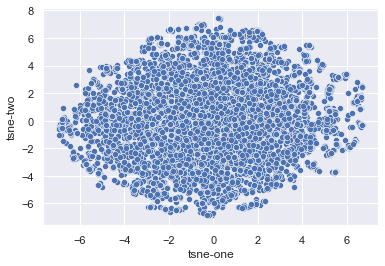

In [47]:
import seaborn as sns
sns.set_theme()
sns.scatterplot(
    x="tsne-one", y="tsne-two",
    data=df
)